In [3]:
from tensorflow import keras

In [4]:
# 코랩에서 실행하는 경우에는 다음 명령을 실행하여 best-cnn-model.h5 파일을 다운로드받아 사용하세요.
!wget https://github.com/rickiepark/hg-mldl/raw/master/best-cnn-model.h5

--2021-06-19 10:33:28--  https://github.com/rickiepark/hg-mldl/raw/master/best-cnn-model.h5
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/best-cnn-model.h5 [following]
--2021-06-19 10:33:29--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/best-cnn-model.h5
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4044200 (3.9M) [application/octet-stream]
Saving to: ‘best-cnn-model.h5’

best-cnn-model.h5   100%[===================>]   3.86M  --.-KB/s    in 0.1s    

2021-06-19 10:33:29 (37.6 MB/s) - ‘best-cnn-model.h5’ saved [4044200/4044200]



In [5]:
model = keras.models.load_model('best-cnn-model.h5')

In [6]:
model.layers

In [7]:
conv = model.layers[0]
print(conv.weights[0].shape, conv.weights[1].shape)

(3, 3, 1, 32) (32,)


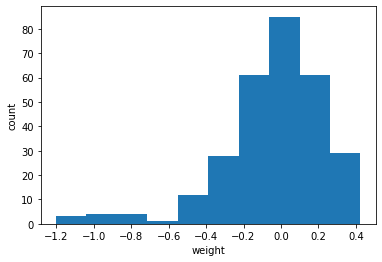

In [8]:
import matplotlib.pyplot as plt
conv_weights = conv.weights[0].numpy()

plt.hist(conv_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

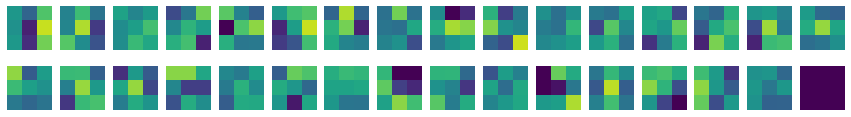

In [9]:
fig, axs = plt.subplots(2,16, figsize=(15,2))

for i in range(2):
    for j in range(16):
        axs[i,j].imshow(conv_weights[:,:,0,i*16+j], vmin=-0.5, vmax=0.5)
        axs[i,j].axis('off')
plt.show()

# function API

In [11]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [12]:
conv_acti = keras.Model(model.input, model.layers[0].output)

inputs = train_input[0:1].reshape(-1, 28,28,1) /255.0
feature_map = conv_acti.predict(inputs)
print(feature_map)

[[[[0.         0.         0.         ... 0.         0.
    0.31543908]
   [0.         0.         0.         ... 0.         0.
    0.31543908]
   [0.         0.         0.         ... 0.         0.
    0.31543908]
   ...
   [0.         0.         0.         ... 0.         0.
    0.31543908]
   [0.         0.         0.         ... 0.         0.
    0.31543908]
   [0.         0.         0.         ... 0.         0.
    0.31543908]]

  [[0.         0.         0.         ... 0.         0.
    0.31543908]
   [0.         0.         0.         ... 0.         0.
    0.31543908]
   [0.         0.         0.         ... 0.         0.
    0.31543908]
   ...
   [0.         0.         0.         ... 0.         0.
    0.31543908]
   [0.         0.         0.         ... 0.         0.
    0.31543908]
   [0.         0.         0.         ... 0.         0.
    0.31543908]]

  [[0.         0.         0.         ... 0.         0.
    0.31543908]
   [0.         0.         0.         ... 0.         0.
    

# 두번 째 특성 맵 시각화

In [14]:
conv2_acti = keras.Model(model.input, model.layers[2].output)

feature_map = conv2_acti.predict(inputs)
print(feature_map.shape)

(1, 14, 14, 64)
